In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import numpy as np
# Charger les données
train_data = pd.read_hdf("data/train_dc2020.h5", 'data')
labels = pd.read_csv('data/train_labels.csv')

In [3]:
train_data.columns

Index([           (0, 'ask'),           (0, 'ask1'),       (0, 'ask_size'),
            (0, 'ask_size1'),            (0, 'bid'),           (0, 'bid1'),
             (0, 'bid_size'),      (0, 'bid_size1'),          (0, 'price'),
                  (0, 'qty'),      (0, 'source_id'),            (0, 'tod'),
       (0, 'ts_last_update'),            (1, 'ask'),           (1, 'ask1'),
             (1, 'ask_size'),      (1, 'ask_size1'),            (1, 'bid'),
                 (1, 'bid1'),       (1, 'bid_size'),      (1, 'bid_size1'),
       (1, 'ts_last_update'),            (2, 'ask'),           (2, 'ask1'),
             (2, 'ask_size'),      (2, 'ask_size1'),            (2, 'bid'),
                 (2, 'bid1'),       (2, 'bid_size'),      (2, 'bid_size1'),
       (2, 'ts_last_update'),            (3, 'ask'),           (3, 'ask1'),
             (3, 'ask_size'),      (3, 'ask_size1'),            (3, 'bid'),
                 (3, 'bid1'),       (3, 'bid_size'),      (3, 'bid_size1'),
       (3, '

In [4]:
train_data.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,...,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,0
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,...,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,1
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,...,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,...,0.013886,4,49549010300,0.5,0.006943,1,49549010200,48,64,3
4,15.0,442.0,0.035689,0.071378,-391.0,-397.0,0.035689,0.035689,3.0,0.035689,...,0.035689,2,42452055000,-8.0,0.035689,3,42451072650,52,231,4


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959506 entries, 0 to 959505
Data columns (total 97 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   (0, ask)             959487 non-null  float32
 1   (0, ask1)            959484 non-null  float32
 2   (0, ask_size)        959487 non-null  float32
 3   (0, ask_size1)       959484 non-null  float32
 4   (0, bid)             959488 non-null  float32
 5   (0, bid1)            959486 non-null  float32
 6   (0, bid_size)        959488 non-null  float32
 7   (0, bid_size1)       959486 non-null  float32
 8   (0, price)           959506 non-null  float32
 9   (0, qty)             959506 non-null  float32
 10  (0, source_id)       959506 non-null  int32  
 11  (0, tod)             959506 non-null  int64  
 12  (0, ts_last_update)  959506 non-null  int64  
 13  (1, ask)             959500 non-null  float32
 14  (1, ask1)            959492 non-null  float32
 15  (1, ask_size)        9

In [6]:
train_data.describe()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
count,959487.000000,959484.000000,959487.000000,959484.000000,959488.000000,959486.000000,959488.000000,959486.000000,959506.000000,9.595060e+05,...,9.595060e+05,959506.000000,9.595060e+05,959506.000000,9.595060e+05,959506.000000,9.595060e+05,959506.000000,959506.000000,959506.000000
mean,79.347153,313.156250,0.028768,0.036867,-89.951057,-319.875854,0.029108,0.036888,5.054900,1.729041e-02,...,1.805408e-02,2.959103,4.729393e+10,50.915878,1.803792e-02,2.958547,4.729078e+10,246.057638,122.249329,479752.500000
std,393.277008,634.442505,0.021420,0.029134,420.279327,646.534607,0.022305,0.028850,2250.730713,1.991885e-02,...,2.272931e-02,1.362509,7.658573e+09,7139.249512,2.238285e-02,1.363040,7.659177e+09,146.808244,76.072543,276985.668032
min,-0.500000,0.015000,0.000002,0.000008,-10142.000000,-13060.000000,0.000003,0.000003,-25592.500000,6.127000e-07,...,6.127000e-07,0.000000,3.420001e+10,-57640.000000,6.127000e-07,0.000000,3.420000e+10,0.000000,2.000000,0.000000
25%,2.500000,7.500000,0.013923,0.016664,-18.000000,-420.000000,0.013860,0.016748,-0.500000,3.556911e-03,...,4.194922e-03,2.000000,4.024255e+10,-1.000000,4.191675e-03,2.000000,4.023918e+10,118.000000,54.000000,239876.250000
50%,7.500000,160.500000,0.027071,0.032373,-7.500000,-169.000000,0.027159,0.032468,0.000000,1.265823e-02,...,1.362398e-02,3.000000,4.756172e+10,0.000000,1.360914e-02,3.000000,4.755761e+10,242.000000,123.000000,479752.500000
75%,17.000000,412.000000,0.038550,0.050213,-2.500000,-7.500000,0.038841,0.050378,0.500000,2.751629e-02,...,2.794077e-02,4.000000,5.495490e+10,1.000000,2.794858e-02,4.000000,5.495230e+10,374.000000,189.000000,719628.750000
max,10177.000000,13273.500000,0.915631,0.938088,0.500000,-0.015000,0.847400,0.880432,996495.500000,3.896014e+00,...,3.075269e+00,5.000000,5.759998e+10,999537.000000,4.168245e+00,5.000000,5.759998e+10,499.000000,255.000000,959505.000000


In [7]:
# sns.heatmap(train_data.isna(), cbar=False)

In [8]:
missing = train_data.isna().sum()
print(missing[missing > 0])

(0, ask)                  19
(0, ask1)                 22
(0, ask_size)             19
(0, ask_size1)            22
(0, bid)                  18
(0, bid1)                 20
(0, bid_size)             18
(0, bid_size1)            20
(1, ask)                   6
(1, ask1)                 14
(1, ask_size)              6
(1, ask_size1)            14
(1, bid)                  13
(1, bid1)                 17
(1, bid_size)             13
(1, bid_size1)            17
(2, ask)                 551
(2, ask1)              15579
(2, ask_size)            551
(2, ask_size1)         15579
(2, bid)                 562
(2, bid1)              18548
(2, bid_size)            562
(2, bid_size1)         18548
(2, ts_last_update)      510
(3, ask)                  18
(3, ask1)                 19
(3, ask_size)             18
(3, ask_size1)            19
(3, bid)                  18
(3, bid1)                 19
(3, bid_size)             18
(3, bid_size1)            19
dtype: int64


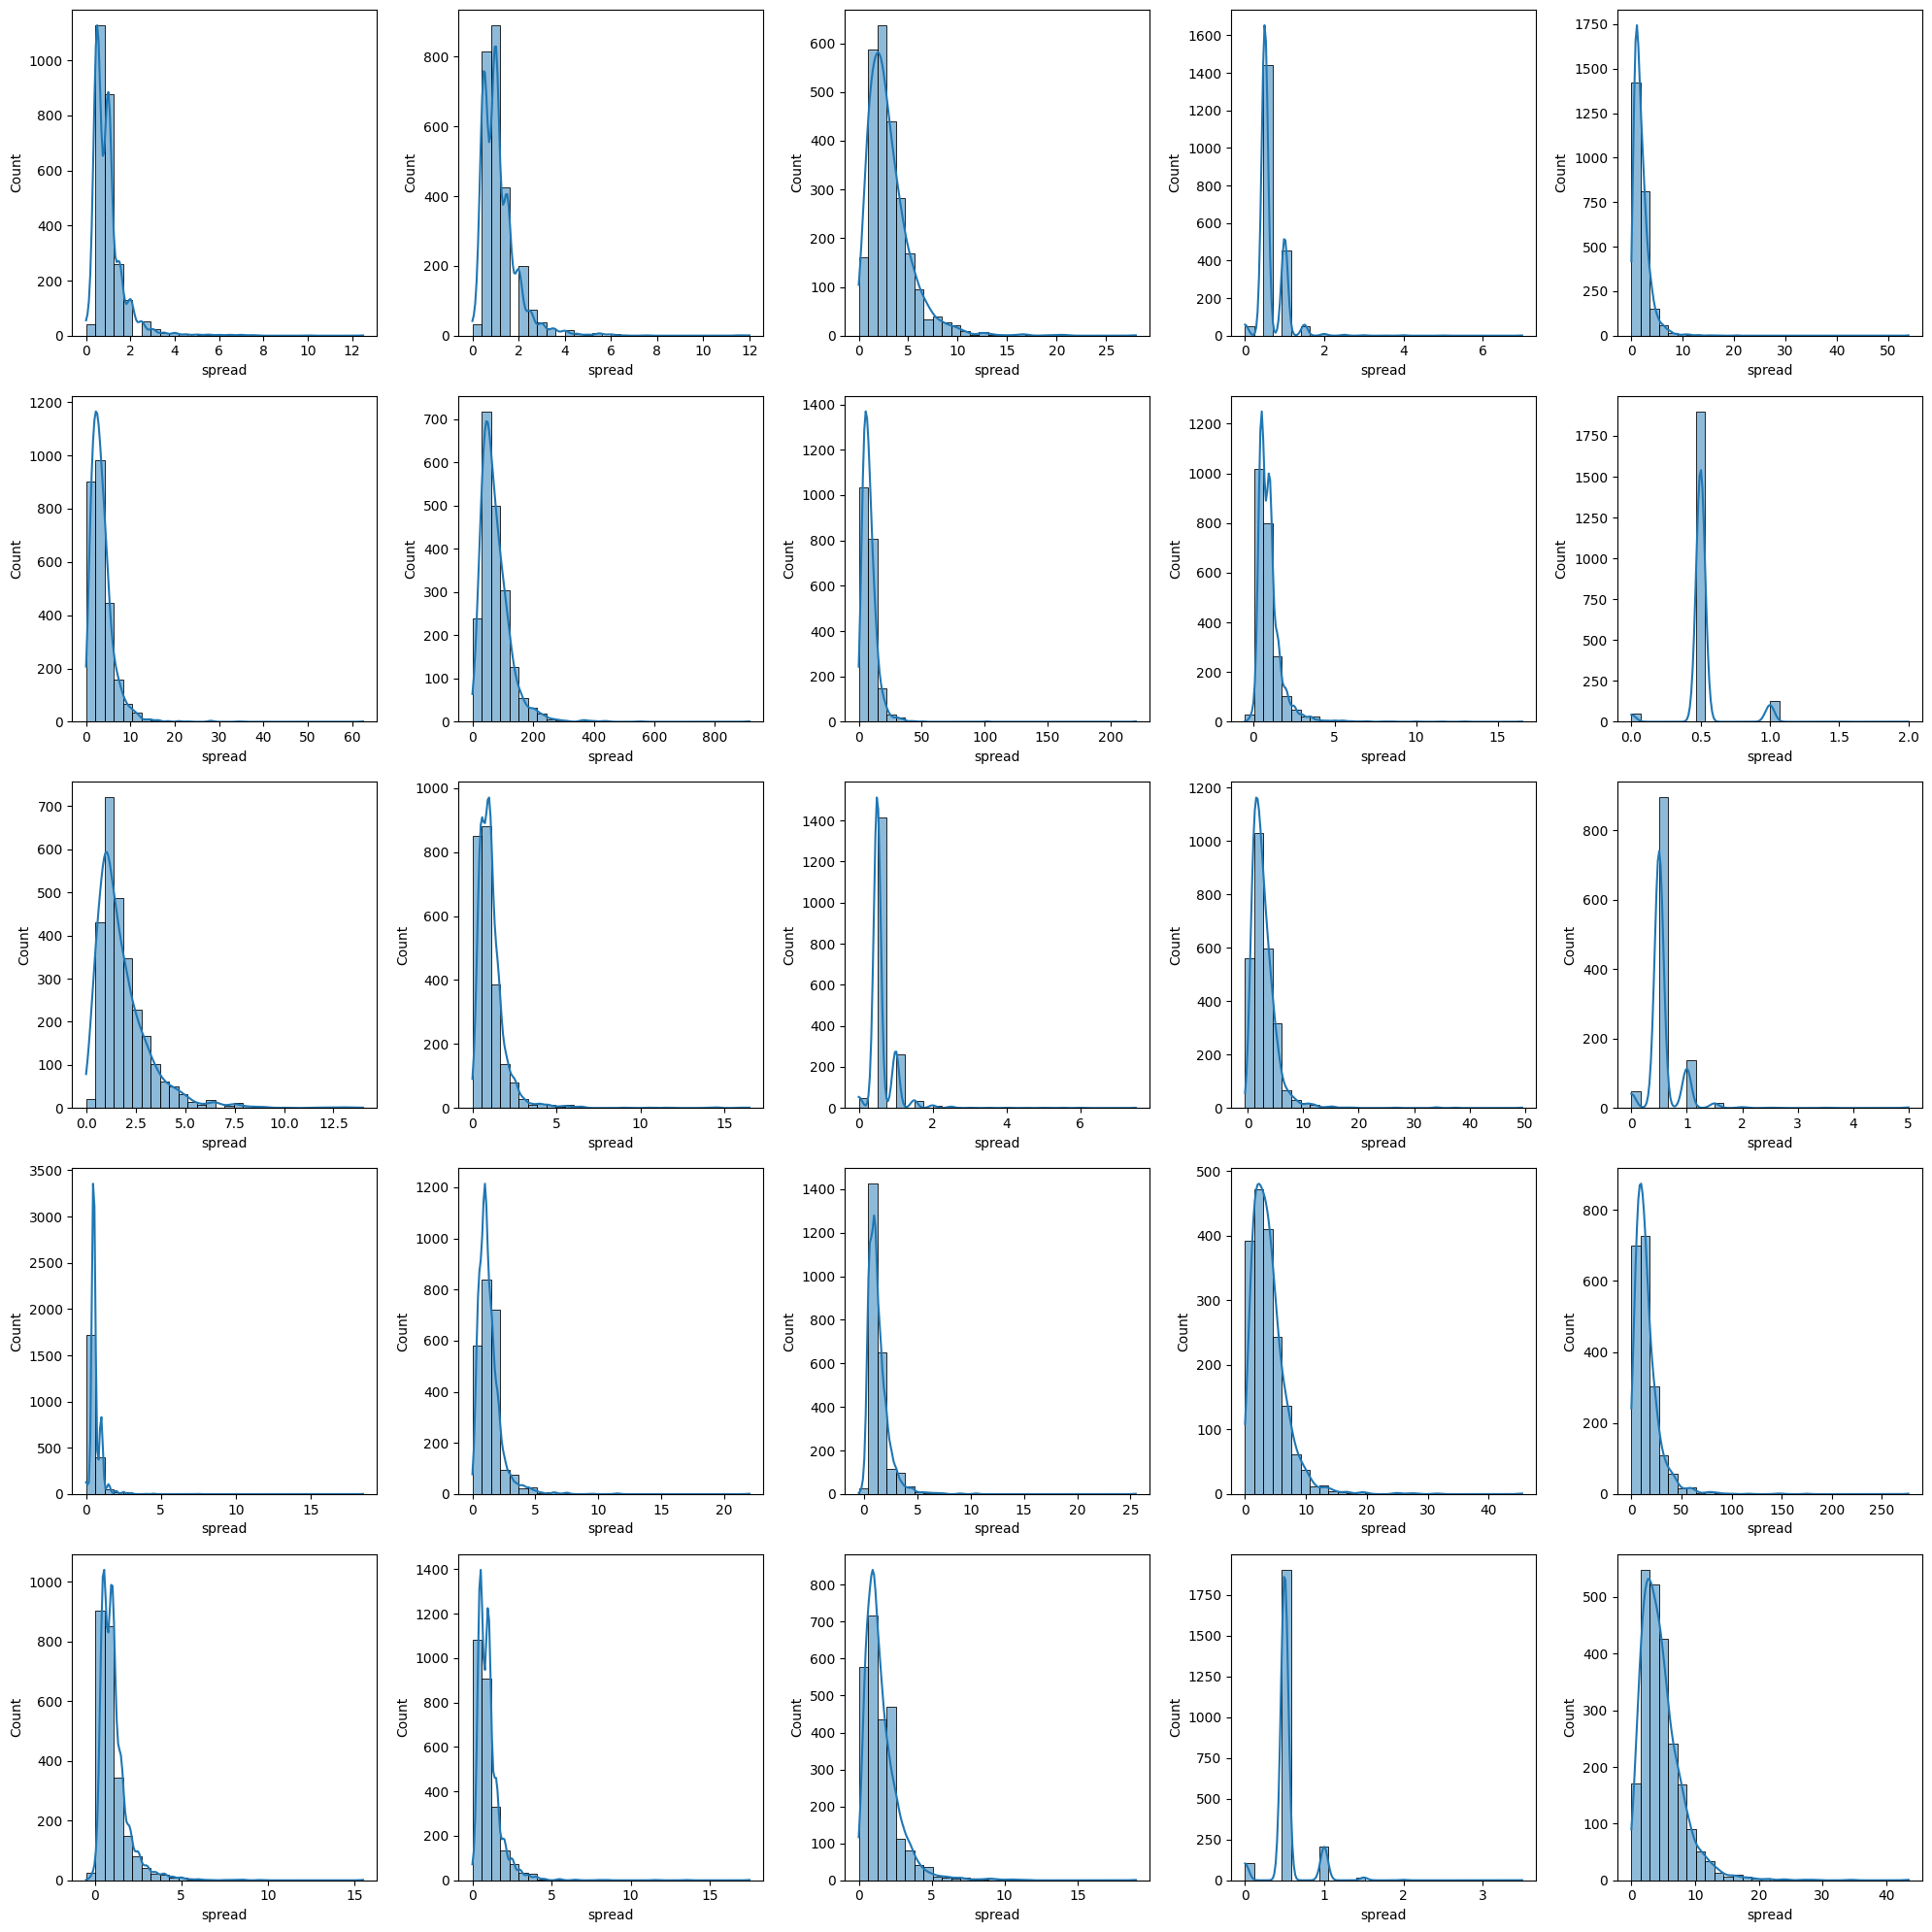

In [ ]:
def plot_aggregate_spread_distribution(data, n=25):
    data_agg = data.copy()
    data_agg = utils.compute_best_spread(data_agg)
    
    n_stocks = data_agg['stock_id'].nunique()
    a = np.random.randint(0, n_stocks, n)
    
    unique_stock_ids = data_agg['stock_id'].unique()[a]
    num_plots = len(unique_stock_ids)
    num_cols = round(np.sqrt(n))
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axes = axes.flatten()
    
    for i, stock_id in enumerate(unique_stock_ids):
        stock_data = data_agg[data_agg['stock_id'] == stock_id]
        sns.histplot(stock_data['spread'], bins=30, ax=axes[i], kde=True)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    
plot_aggregate_price_evolution(train_data)

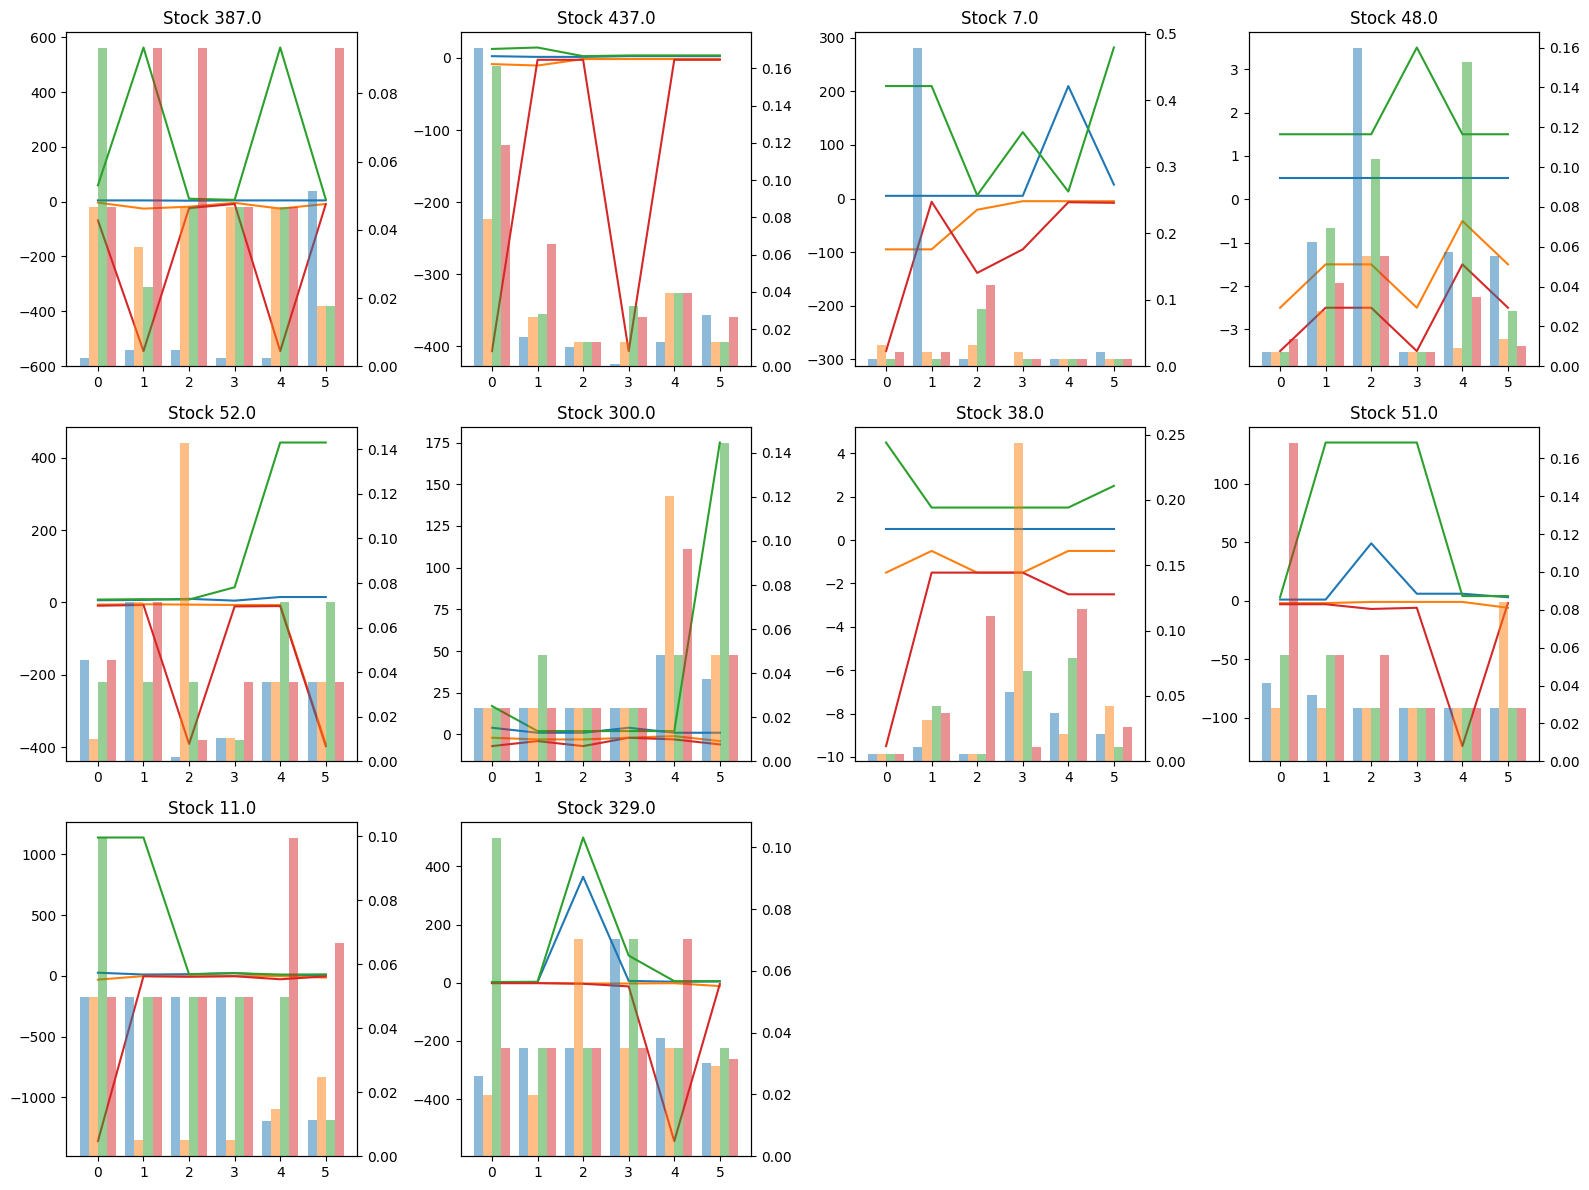

In [10]:
def visualize_all_order_books(data, n=10):
    data = data.iloc[:n]
    
    num_cols = 4
    num_rows = (n // num_cols) + (n % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()
    
    for idx, (_, row) in enumerate(data.iterrows()):
        ask = [row[(i, "ask")] for i in range(6)]
        ask_1 = [row[(i, "ask1")] for i in range(6)]
        bid = [row[(i, "bid")] for i in range(6)]
        bid_1 = [row[(i, "bid1")] for i in range(6)]
        
        ask_size = [row[(i, "ask_size")] for i in range(6)]
        ask_size_1 = [row[(i, "ask_size1")] for i in range(6)]
        bid_size = [row[(i, "bid_size")] for i in range(6)]
        bid_size_1 = [row[(i, "bid_size1")] for i in range(6)]
        
        source_id = [row[(i, "source_id")] for i in range(6)]
        
        ask = sorted(ask, key=lambda x: source_id[ask.index(x)])
        ask_1 = sorted(ask_1, key=lambda x: source_id[ask_1.index(x)])
        bid = sorted(bid, key=lambda x: source_id[bid.index(x)])
        bid_1 = sorted(bid_1, key=lambda x: source_id[bid_1.index(x)])
        
        ask_size = sorted(ask_size, key=lambda x: source_id[ask_size.index(x)])
        ask_size_1 = sorted(ask_size_1, key=lambda x: source_id[ask_size_1.index(x)])
        bid_size = sorted(bid_size, key=lambda x: source_id[bid_size.index(x)])
        bid_size_1 = sorted(bid_size_1, key=lambda x: source_id[bid_size_1.index(x)])
        
        
        ax = axes[idx]
        ax.set_title(f"Stock {row['stock_id']}")
        
        ax.plot(ask, label="ask")
        ax.plot(bid, label="bid")
        ax.plot(ask_1, label="ask_1")
        ax.plot(bid_1, label="bid_1")
        
        
        ax2 = ax.twinx()
        x = np.arange(6)
        width = 0.2
        ax2.bar(x - width*1.5, ask_size, width, label="ask_size", alpha=0.5)
        ax2.bar(x - width*0.5, bid_size, width, label="bid_size", alpha=0.5)
        ax2.bar(x + width*0.5, ask_size_1, width, label="ask_size_1", alpha=0.5)
        ax2.bar(x + width*1.5, bid_size_1, width, label="bid_size_1", alpha=0.5)
        ax2.set_xticks(x)
        ax2.set_xticklabels([str(i) for i in range(6)])
    
    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

visualize_all_order_books(train_data)
